In [1]:
# libraries
require(eulerr)
require(ggplot2)
require(ggalluvial)

Loading required package: eulerr

Warning message:
“package ‘eulerr’ was built under R version 4.1.3”
Loading required package: ggplot2

Loading required package: ggalluvial

Warning message:
“package ‘ggalluvial’ was built under R version 4.1.3”


In [2]:
community_input_dir <- "../../compare_algorithms/prepare_data/run_community/outs/"
cpdb_input_dir <- "../../compare_algorithms/prepare_data/run_CellPhoneDB/run_algorithm/outs/"
nn_input_dir <- "../../compare_algorithms/prepare_data/run_NicheNet/run_algorithm/outs/"

Load data.

In [3]:
suppressWarnings(load(paste0(community_input_dir,"community_interactions.RData")))
print(str(community_interactions))

List of 23
 $ per_sample_anno_interactions:List of 13
  ..$ AML-0024    :'data.frame':	151744 obs. of  29 variables:
  .. ..$ interaction_ID     : chr [1:151744] "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
  .. ..$ ligand_gene_name   : chr [1:151744] "JAG2" "DLL1" "IGF1" "JAG1" ...
  .. ..$ receptor_gene_name : chr [1:151744] "NOTCH1" "NOTCH1" "IGF1R" "NOTCH1" ...
  .. ..$ sending_cell_type  : chr [1:151744] "Mono" "Mono" "Mono" "Mono" ...
  .. ..$ receiving_cell_type: chr [1:151744] "Mono" "Mono" "Mono" "Mono" ...
  .. ..$ f_s                : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_r                : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_s_max            : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_r_max            : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ a_s_l              : num [1:151744] 0 0 0 0 0.168 ...
  .. ..$ nr_s_l_active      : num [1:151744] 0 0 0 0 914 3190 0 0

In [4]:
suppressWarnings(load(paste0(cpdb_input_dir,"cpdb_interactions.RData")))
print(str(cpdb_interactions))

List of 2
 $ weights          : tibble [2,421 × 14] (S3: tbl_df/tbl/data.frame)
  ..$ interaction_ID: chr [1:2421] "B:CD320_Mono:JAML" "DC:CD320_Mono:JAML" "Ery:CD320_Mono:JAML" "HSPC:CD320_Mono:JAML" ...
  ..$ AML-0024      : int [1:2421] 0 0 0 0 0 1 1 1 0 1 ...
  ..$ AML-0160      : int [1:2421] 0 0 1 1 0 1 0 0 0 0 ...
  ..$ AML-0693      : int [1:2421] 0 0 1 0 0 0 0 0 0 0 ...
  ..$ AML-1371      : int [1:2421] 1 0 0 0 1 1 0 0 0 1 ...
  ..$ AML-2123      : int [1:2421] 0 0 1 0 1 1 0 0 0 0 ...
  ..$ AML-3133      : int [1:2421] 0 1 1 0 1 0 0 0 0 0 ...
  ..$ AML-4340      : int [1:2421] 0 0 0 0 0 0 1 1 1 1 ...
  ..$ healthy-1     : int [1:2421] 0 0 1 1 0 0 1 1 0 1 ...
  ..$ healthy-2     : int [1:2421] 0 0 1 1 0 0 0 0 0 0 ...
  ..$ healthy-3     : int [1:2421] 0 0 1 1 1 1 0 0 0 0 ...
  ..$ healthy-4     : int [1:2421] 0 0 1 1 0 1 0 0 0 0 ...
  ..$ healthy-4003  : int [1:2421] 0 0 1 1 0 0 0 0 0 0 ...
  ..$ healthy-5     : int [1:2421] 0 0 1 1 0 0 0 0 0 0 ...
 $ anno_interactions:'data.f

In [5]:
suppressWarnings(load(paste0(nn_input_dir,"nn_interactions.RData")))
print(str(nn_interactions))

List of 2
 $ weights          : tibble [11,428 × 14] (S3: tbl_df/tbl/data.frame)
  ..$ interaction_ID: chr [1:11428] "Mono:ACKR3_Mono:CXCR4" "Mono:ALOX5AP_Mono:ALOX5" "Mono:AREG_Mono:ICAM1" "Mono:CD14_Mono:ITGA4" ...
  ..$ AML-0024      : num [1:11428] 0.285 3.322 1.609 0.14 0.097 ...
  ..$ AML-0160      : num [1:11428] NA 3.322 1.609 0.14 0.097 ...
  ..$ AML-0693      : num [1:11428] NA 3.322 NA 0.14 0.097 ...
  ..$ AML-1371      : num [1:11428] NA 3.322 NA 0.14 0.097 ...
  ..$ AML-2123      : num [1:11428] NA 3.322 NA 0.14 0.097 ...
  ..$ AML-3133      : num [1:11428] NA 3.322 NA 0.14 0.097 ...
  ..$ AML-4340      : num [1:11428] NA 3.322 1.609 0.14 0.097 ...
  ..$ healthy-1     : num [1:11428] NA 3.322 1.609 0.14 0.097 ...
  ..$ healthy-2     : num [1:11428] NA 3.322 1.609 0.14 0.097 ...
  ..$ healthy-3     : num [1:11428] NA 3.322 1.609 0.14 0.097 ...
  ..$ healthy-4     : num [1:11428] NA 3.322 NA 0.14 0.097 ...
  ..$ healthy-4003  : num [1:11428] NA 3.322 NA 0.14 0.097 ...
  ..$ 

In [6]:
# check if all interaction IDs for CPDB are in community (all)
all(cpdb_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

In [7]:
# check if all interaction IDs for CPDB are in community (all)
all(nn_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

# plot data

## Euler diagram of differential interactions

In [8]:
# index of significant interactions in community
idx_sign <- !is.na(community_interactions$anno_interactions$sign) & community_interactions$anno_interactions$sign

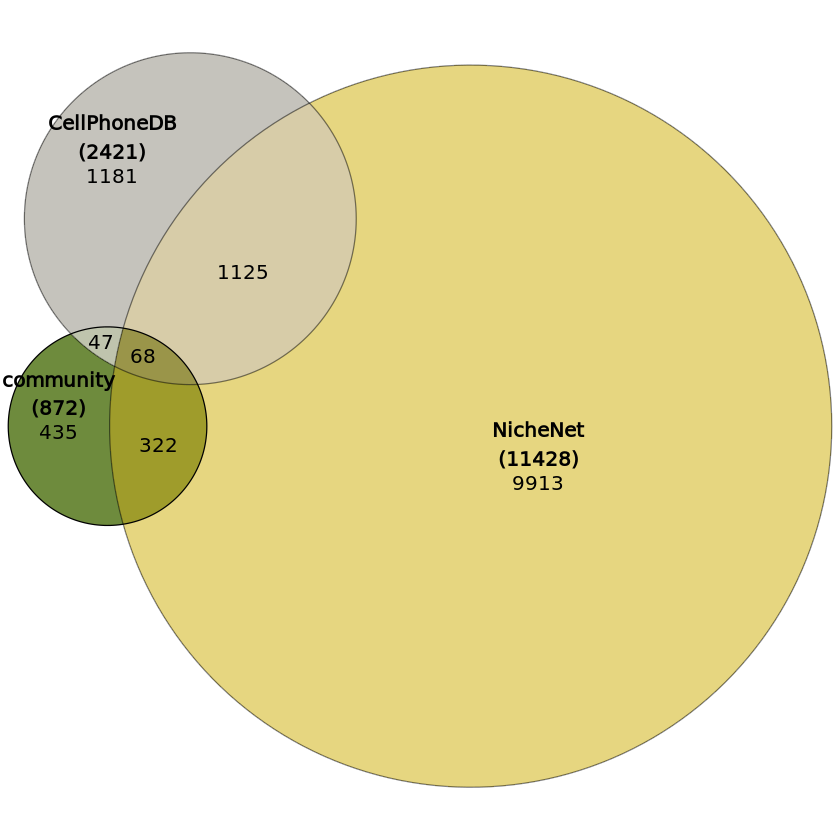

In [9]:
int_list <- list(community = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,NicheNet = nn_interactions$anno_interactions$interaction_ID
                ,CellPhoneDB = cpdb_interactions$anno_interactions$interaction_ID
                )

# add numbers to the names
numbers <- c(sum(idx_sign)
            ,length(nn_interactions$anno_interactions$interaction_ID)
            ,length(cpdb_interactions$anno_interactions$interaction_ID)
            )
names(int_list) <- paste0(names(int_list)
                         ,"\n"
                         ,"("
                         ,numbers
                         ,")")

plot(euler(int_list
          )
     ,fills = c(community = "darkolivegreen4"
                ,NicheNet = "gold3"
                ,CellPhoneDB = "cornsilk4"#"rosybrown"
               )
     ,alpha=c(1,0.5,0.5)
     ,quantities = list(fontsize = 12)
    )

## Interactions stratified by quality

In [10]:
# index of good interactions for community
idx_good <- community_interactions$anno_interactions$passed_QC_filter

In [11]:
# stacked bar
id_good <- community_interactions$anno_interactions$interaction_ID[idx_good]
id_bad <- community_interactions$anno_interactions$interaction_ID[!idx_good]
data <- data.frame(algorithm = c("CPDB"
                                 ,"CPDB"
                                 ,"NicheNet"
                                 , "NicheNet"
                                )
                  ,quality_by_community = c("good"
                                           ,"bad"
                                           ,"good"
                                           ,"bad"
                                           )
                  ,number = c(sum(cpdb_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(cpdb_interactions$anno_interactions$interaction_ID %in% id_bad)
                              ,sum(nn_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(nn_interactions$anno_interactions$interaction_ID %in% id_bad)
                             )
                  )

  algorithm quality_by_community number
1      CPDB                 good   1236
2      CPDB                  bad   1185
3  NicheNet                 good   4800
4  NicheNet                  bad   6628


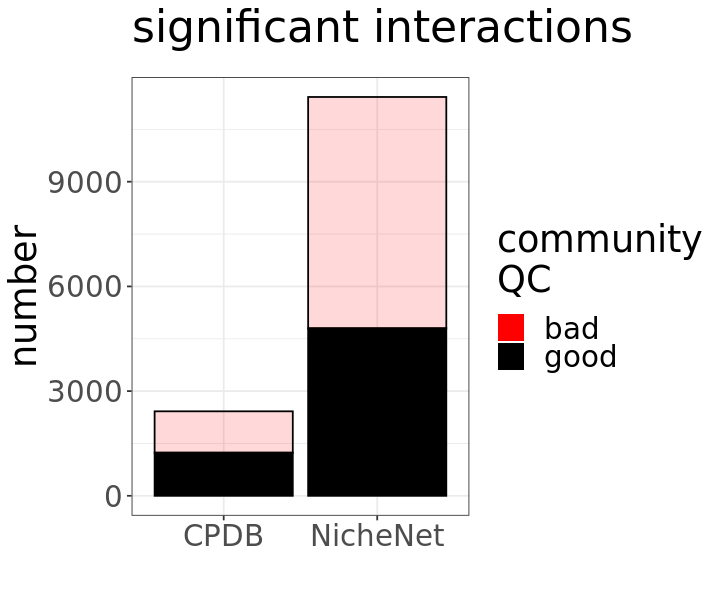

In [12]:
print(data)
options(repr.plot.width = 6
       ,repr.plot.height = 5)
ggplot(data
       , aes(x=algorithm
             , y=number
             ,fill=quality_by_community 
             ,color=quality_by_community
             ,alpha=quality_by_community
            )
      ) + 
    geom_bar(position="stack"
             ,stat="identity"
            )+
xlab("")+
ggtitle("significant interactions")+
scale_fill_manual(name = "community\nQC"
                   ,values = c("red","black")
                   )+
scale_color_manual(name= NULL
                  ,values = c("black","black")
                  ,guide = "none")+
scale_alpha_manual(name= NULL
                  ,values = c(0.15,1)
                  ,guide = "none"
                  )+
theme_bw()+
theme(text = element_text(size=22)
      ,plot.title = element_text(margin = margin(t = 0, r = 0, b = 15, l = 0))
     )

In [13]:
plot_nr_samples <- function(my_df
                           ,name){
    options(repr.plot.height = 5
        ,repr.plot.width = 5)
ggplot(data = my_df
      ,aes(x = number_healthy
          ,y = number_aml
          )
      )+
geom_jitter()+
theme_bw()+
xlab("number of healthy samples")+
ylab("number of AML samples")+
theme(text = element_text(size=22)
      ,plot.title = element_text(margin = margin(t = 0, r = 0, b = 15, l = 0))
      ,axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0))
     )+
ggtitle(name)
}

In [14]:
head(cpdb_interactions$weights)

interaction_ID,AML-0024,AML-0160,AML-0693,AML-1371,AML-2123,AML-3133,AML-4340,healthy-1,healthy-2,healthy-3,healthy-4,healthy-4003,healthy-5
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B:CD320_Mono:JAML,0,0,0,1,0,0,0,0,0,0,0,0,0
DC:CD320_Mono:JAML,0,0,0,0,0,1,0,0,0,0,0,0,0
Ery:CD320_Mono:JAML,0,1,1,0,1,1,0,1,1,1,1,1,1
HSPC:CD320_Mono:JAML,0,1,0,0,0,0,0,1,1,1,1,1,1
NK:CD320_Mono:JAML,0,0,0,1,1,1,0,0,0,1,0,0,0
T:CD320_Mono:JAML,1,1,0,1,1,0,0,0,0,1,1,0,0


In [15]:
rownames(community_interactions$weights) <- community_interactions$weights$interaction_ID
rownames(cpdb_interactions$weights) <- cpdb_interactions$weights$interaction_ID
rownames(nn_interactions$weights) <- nn_interactions$weights$interaction_ID

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


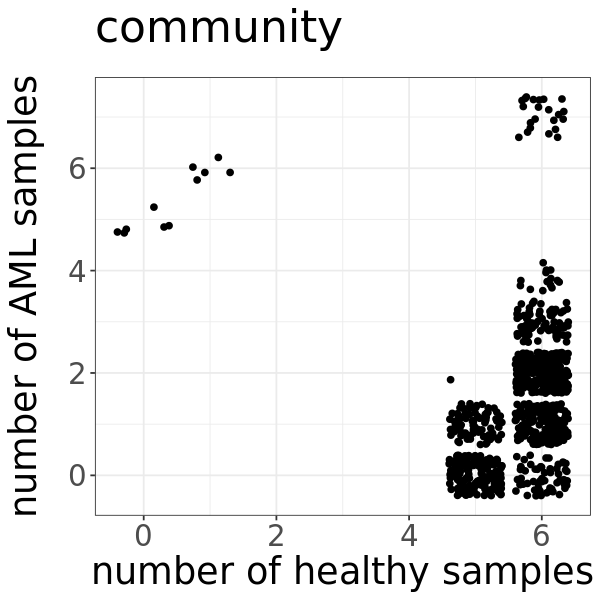

In [16]:
# sample coverage: community
idx_case <- community_interactions$anno_samples$case_or_control == "case"
non_zero_weights <- community_interactions$weights[idx_sign,] !=0
df <- data.frame(interaction_ID = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )

plot_nr_samples(df,"community")

tibble [2,421 × 14] (S3: tbl_df/tbl/data.frame)
 $ interaction_ID: chr [1:2421] "B:CD320_Mono:JAML" "DC:CD320_Mono:JAML" "Ery:CD320_Mono:JAML" "HSPC:CD320_Mono:JAML" ...
 $ AML-0024      : int [1:2421] 0 0 0 0 0 1 1 1 0 1 ...
 $ AML-0160      : int [1:2421] 0 0 1 1 0 1 0 0 0 0 ...
 $ AML-0693      : int [1:2421] 0 0 1 0 0 0 0 0 0 0 ...
 $ AML-1371      : int [1:2421] 1 0 0 0 1 1 0 0 0 1 ...
 $ AML-2123      : int [1:2421] 0 0 1 0 1 1 0 0 0 0 ...
 $ AML-3133      : int [1:2421] 0 1 1 0 1 0 0 0 0 0 ...
 $ AML-4340      : int [1:2421] 0 0 0 0 0 0 1 1 1 1 ...
 $ healthy-1     : int [1:2421] 0 0 1 1 0 0 1 1 0 1 ...
 $ healthy-2     : int [1:2421] 0 0 1 1 0 0 0 0 0 0 ...
 $ healthy-3     : int [1:2421] 0 0 1 1 1 1 0 0 0 0 ...
 $ healthy-4     : int [1:2421] 0 0 1 1 0 1 0 0 0 0 ...
 $ healthy-4003  : int [1:2421] 0 0 1 1 0 0 0 0 0 0 ...
 $ healthy-5     : int [1:2421] 0 0 1 1 0 0 0 0 0 0 ...
 logi [1:2421, 1:14] TRUE TRUE TRUE TRUE TRUE TRUE ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1

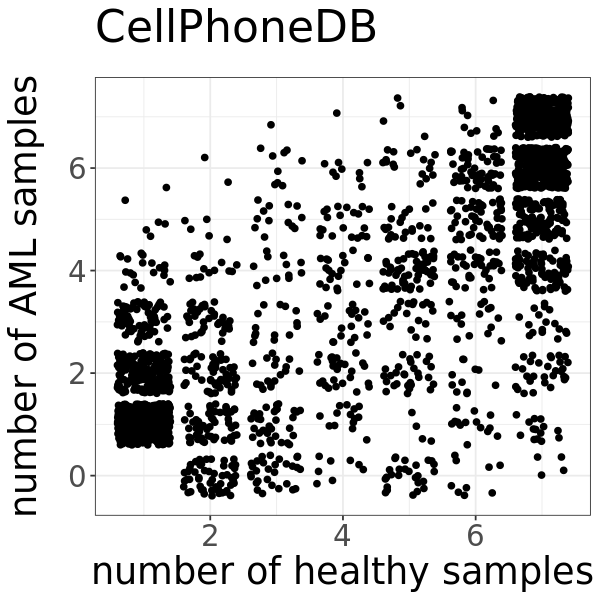

In [17]:
# sample coverage: CPDB
idx_case <- grepl("AML",colnames(cpdb_interactions$weights))
non_zero_weights <- cpdb_interactions$weights !=0
str(cpdb_interactions$weights)
str(non_zero_weights)
df_cpdb <- data.frame(interaction_ID = rownames(cpdb_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_cpdb, "CellPhoneDB")

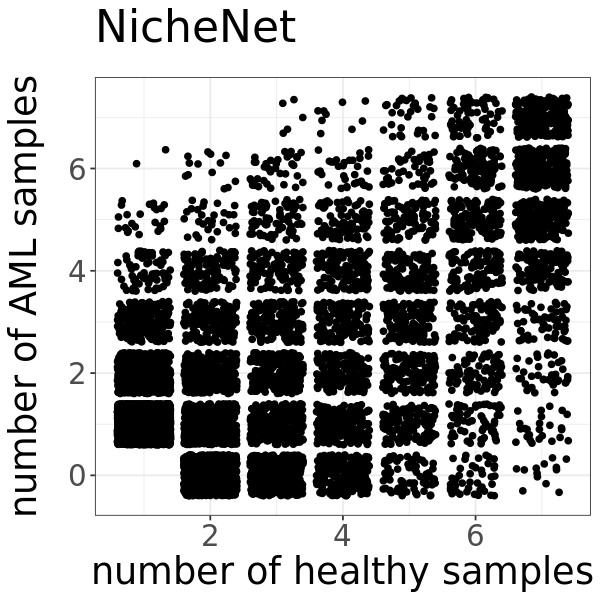

In [18]:
# sample coverage:NN
idx_case <- grepl("AML",colnames(nn_interactions$weights))
non_zero_weights <- !is.na(nn_interactions$weights)
df_nn <- data.frame(interaction_ID = rownames(nn_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_nn, "NicheNet")

List of 3
 $ community  : chr [1:872] "Mono:RETN_Mono:CAP1" "Mono:PTGS2_Mono:ALOX5" "Mono:ANXA1_Gran:FPR1" "Mono:RETN_Gran:CAP1" ...
 $ NicheNet   : chr [1:3878] "Mono:ALOX5AP_Mono:ALOX5" "Mono:AREG_Mono:ICAM1" "Mono:CD14_Mono:ITGA4" "Mono:CD14_Mono:ITGB1" ...
 $ CellPhoneDB: chr [1:1462] "Ery:CD320_Mono:JAML" "HSPC:CD320_Mono:JAML" "T:CD320_Mono:JAML" "DC:HBEGF_HSPC:CD44" ...
NULL


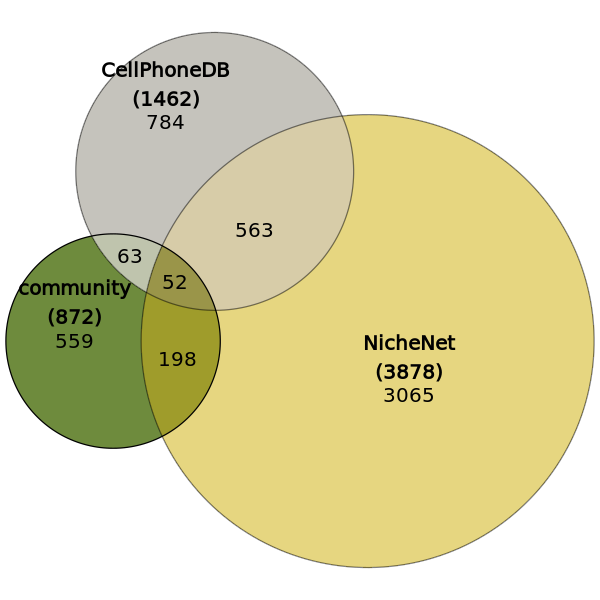

In [19]:
idx_good_cpdb <- df_cpdb$number_healthy >= 4 | df_cpdb$number_aml >= 4
idx_good_nn <- df_nn$number_healthy >= 4 | df_nn$number_aml >= 4

int_list <- list(community = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,NicheNet = df_nn$interaction_ID[idx_good_nn]
                ,CellPhoneDB = df_cpdb$interaction_ID[idx_good_cpdb]
                )
print(str(int_list))

# add numbers to the names
numbers <- c(sum(idx_sign)
            ,sum(idx_good_nn)
            ,sum(idx_good_cpdb)
            )
names(int_list) <- paste0(names(int_list)
                         ,"\n"
                         ,"("
                         ,numbers
                         ,")")

plot(euler(int_list
         # , shape = "ellipse"
          )
     ,fills = c(community = "darkolivegreen4"
                ,NicheNet = "gold3"
                ,CellPhoneDB = "cornsilk4"#"rosybrown"
               )
     ,alpha=c(1,0.5,0.5)
     ,quantities = list(fontsize = 12)
    )

## Alluvial plot of interactions

The direction of interaction chnges for CPDB and NN will be defined by using the log2FC of the ligand and the receptor. If one or both are upregulated, then the interaction is upregulated. If one or both are downregulated, the interaction is downregulated. If the ligand and the receptor is changed in the disconcordant direciton, then the interaction is ambigous.

In [20]:
head(cpdb_interactions$anno_interactions) 

,interaction_ID,sender_celltype,sender_gene,receiver_celltype,receiver_gene,ligand_log2FC,ligand_p_val_adj,receptor_log2FC,receptor_p_val_adj,direction,direction_lig,direction_rec,direction_lig_rec
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,B:CD320_Mono:JAML,B,CD320,Mono,JAML,NA,NA,-0.2597486,5.07243e-273,down,NA,down,NA_down
2,DC:CD320_Mono:JAML,DC,CD320,Mono,JAML,NA,NA,-0.2597486,5.07243e-273,down,NA,down,NA_down
3,Ery:CD320_Mono:JAML,Ery,CD320,Mono,JAML,NA,NA,-0.2597486,5.07243e-273,down,NA,down,NA_down
4,HSPC:CD320_Mono:JAML,HSPC,CD320,Mono,JAML,NA,NA,-0.2597486,5.07243e-273,down,NA,down,NA_down
5,NK:CD320_Mono:JAML,NK,CD320,Mono,JAML,NA,NA,-0.2597486,5.07243e-273,down,NA,down,NA_down
6,T:CD320_Mono:JAML,T,CD320,Mono,JAML,NA,NA,-0.2597486,5.07243e-273,down,NA,down,NA_down


In [21]:
head(nn_interactions$anno_interactions) 

,interaction_ID,sender_celltype,sender_gene,receiver_celltype,receiver_gene,ligand_log2FC,ligand_p_val_adj,receptor_log2FC,receptor_p_val_adj,direction_lig,direction_rec,direction_lig_rec,direction
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Mono:ACKR3_Mono:CXCR4,Mono,ACKR3,Mono,CXCR4,0.2595831,0,0.3312534,0,up,up,up_up,up
2,Mono:ALOX5AP_Mono:ALOX5,Mono,ALOX5AP,Mono,ALOX5,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
3,Mono:AREG_Mono:ICAM1,Mono,AREG,Mono,ICAM1,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
4,Mono:CD14_Mono:ITGA4,Mono,CD14,Mono,ITGA4,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
5,Mono:CD14_Mono:ITGB1,Mono,CD14,Mono,ITGB1,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
6,Mono:CD14_Mono:ITGB2,Mono,CD14,Mono,ITGB2,NA,NA,NA,NA,NA,NA,NA_NA,ambigous


In [22]:
#Assigned CPDB directions

In [23]:
# assign direction to the intersctions in community
idx_down <- community_interactions$anno_interactions$log2FC_weights < 0
idx_up <- community_interactions$anno_interactions$log2FC_weights > 0

community_interactions$anno_interactions$direction <- NA
community_interactions$anno_interactions$direction[idx_down] <- "down"
community_interactions$anno_interactions$direction[idx_up] <- "up"
community_interactions$anno_interactions$direction[!idx_sign] <- "not significant"

In [24]:
table(community_interactions$anno_interactions$direction)


           down not significant              up 
            858          150872              14 

In [25]:
table(cpdb_interactions$anno_interactions$direction)


ambigous     down       up 
      25     1023     1373 

In [26]:
table(nn_interactions$anno_interactions$direction)


ambigous     down       up 
   10247      597      584 

In [27]:
int_alluvial <- unique(c(community_interactions$anno_interactions$interaction_ID[idx_sign]
                         ,df_cpdb$interaction_ID[idx_good_cpdb]
                         ,df_nn$interaction_ID[idx_good_nn]
                            )
                )
print(str(int_alluvial))

 chr [1:5284] "Mono:RETN_Mono:CAP1" "Mono:PTGS2_Mono:ALOX5" ...
NULL


In [28]:
# prepare the df for plotting
# all three algorithms
rownames(community_interactions$anno_interactions) <- community_interactions$anno_interactions$interaction_ID
rownames(cpdb_interactions$anno_interactions) <- cpdb_interactions$anno_interactions$interaction_ID
rownames(nn_interactions$anno_interactions) <- nn_interactions$anno_interactions$interaction_ID

df_facets <- data.frame(interaction_ID = int_alluvial
                       ,community_sign = community_interactions$anno_interactions[int_alluvial,"sign"]
                       ,community_log2FC_weights = community_interactions$anno_interactions[int_alluvial,"log2FC_weights"]
                        ,community = rep(NA,length(int_alluvial))
                       ,CellPhoneDB = cpdb_interactions$anno_interactions[int_alluvial,"direction"]
                       ,NicheNet = nn_interactions$anno_interactions[int_alluvial,"direction"]
                       )

# simplify the categories for community
df_facets$community_sign[is.na(df_facets$community_sign)] <- FALSE

df_facets$community[(df_facets$community_sign) & (df_facets$community_log2FC_weights > 1)] <- "up"
df_facets$community[(df_facets$community_sign) & (df_facets$community_log2FC_weights < -1)] <- "down"
df_facets$community[!df_facets$community_sign] <- "not\nsignificant"

# present in community but not in CPDB
df_facets$CellPhoneDB[is.na(df_facets$CellPhoneDB)] <- "not\nsignificant"

# present in community but not in NN
df_facets$NicheNet[is.na(df_facets$NicheNet)] <- "not\nsignificant"


df_facets$comparison <- sapply(1:nrow(df_facets)
                               ,function(i) {
                                   paste(df_facets[i,c("community","CellPhoneDB","NicheNet")]
                                        ,collapse = " ")
                               })

df_facets$freq <- table(df_facets$comparison)[df_facets$comparison]
df_facets <- df_facets[!duplicated(df_facets$comparison),]


df_facets$community <- factor(df_facets$community
                                  ,levels = c("up"
                                              ,"down"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$CellPhoneDB <- factor(df_facets$CellPhoneDB
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$NicheNet <- factor(df_facets$NicheNet
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

print((df_facets))

              interaction_ID community_sign community_log2FC_weights
1        Mono:RETN_Mono:CAP1           TRUE               -1.0684138
4        Mono:RETN_Gran:CAP1           TRUE               -1.2523898
8            Mono:CD48_T:CD2           TRUE               -2.3308082
11          Mono:ALCAM_T:CD6           TRUE               11.9089569
23          Mono:CD99_B:CD81           TRUE               -2.7123604
40     Mono:S100A9_HSPC:CD68           TRUE                6.3555872
42     Mono:CALR_HSPC:ITGA2B           TRUE              -11.8973477
160       Gran:CD14_NK:ITGB2           TRUE               -3.2531598
425      HSPC:GP1BB_NK:ITGB2           TRUE               -2.3578063
873        T:CD320_Mono:JAML          FALSE               -1.1826873
874       DC:HBEGF_HSPC:CD44          FALSE                0.3109728
880      Mono:HBEGF_Ery:CD82          FALSE               -2.7052691
903        B:GRN_NK:TNFRSF1B          FALSE                2.3989572
1049    Gran:S100A8_NK:ITGB2      

In [29]:
# prepare colors for plotting
category_colors <- c("not\nsignificant" = "gray90"
                     ,"down" = "lightslateblue"
                     ,"up" = "red3"
                     ,"ambigous" = "darkorchid1"
                    )

Don't know how to automatically pick scale for object of type <table>. Defaulting to continuous.
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


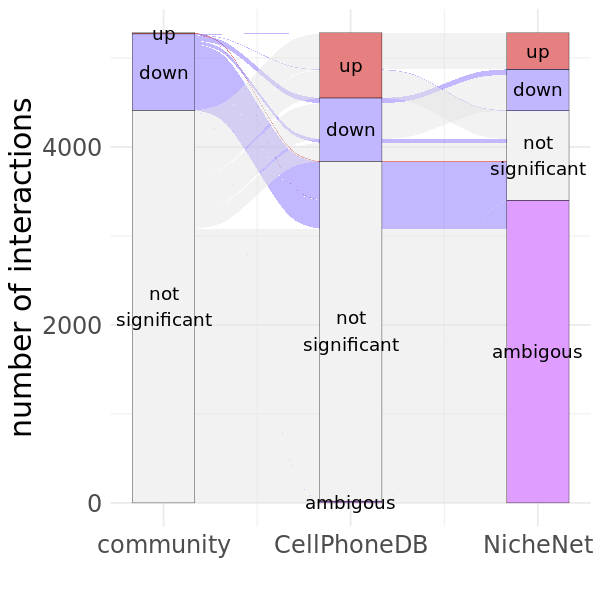

In [30]:
# plot alluvial

options(repr.plot.width = 5
       ,repr.plot.height = 5
       )
ggplot(df_facets,
       aes(y = freq,
           axis1 = community 
           ,axis2 = CellPhoneDB
           ,axis3 = NicheNet
          )
      ) +
geom_alluvium(aes(fill = community)
            #,width = 1/4
             )+
scale_fill_manual(values = category_colors)+
geom_stratum(fill = "white"
            ,linewidth = 0
            #,width = 0.55
            )+
geom_stratum(alpha = 0.5
             ,fill = category_colors[c("not\nsignificant"
                                       ,"down"
                                       ,"up"
                                       
                                      ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"
                                      
                                      ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"
                                      )
                                    ]
            ,linewidth = 0.1
            )+
geom_text(stat = "stratum"
          ,aes(label = after_stat(stratum))
         ) +
ylab("number of interactions")+
xlab("")+
scale_x_continuous(breaks = 1:3
                   ,labels = c("community", "CellPhoneDB", "NicheNet")
                   
                  ) +
theme_minimal()+
theme(legend.position="none"
     ,text = element_text(size = 18)
     )

## Mono:HMGB1_T:CXCR4 interaction

In [31]:
plot_fractions <- function(interaction_ID
                           ,send_or_rec
                           ,health_status
                           ,colors
                          ,my_interactions
                          ,plot.width=3.5){
    idx_my_interaction <- community_interactions$anno_interactions$interaction_ID == interaction_ID

    ifelse(send_or_rec == "sender"
          ,which_fraction  <-  "f_s"
          ,which_fraction  <- "f_r")
    df <- data.frame(fraction = unlist(my_interactions[[which_fraction]][idx_my_interaction,])
                    ,health_status = my_interactions$anno_samples$health_status
                     ,sample_ID = my_interactions$anno_samples$sample_ID
                    )
    
    # check if we need to re-assign health_status
    if("monocytic\nAML" %in% health_status){
        idx_AML_mono <- df$sample_ID %in% c("AML-0024","AML-0160")
        idx_AML <- grepl("AML",df$sample_ID)
        df$health_status[idx_AML_mono] <- "monocytic\nAML"
        df$health_status[idx_AML & !idx_AML_mono] <- "other\nAML"
    }
    
    df$health_status <- factor(df$health_status
                              ,levels = health_status
                              ,ordered = TRUE)
    
    ifelse(send_or_rec == "sender"
          ,cell_type <- "monocytes"
          ,cell_type <- "T cells"
          )
    
    
    options(repr.plot.height = 3
        ,repr.plot.width = plot.width)
    
    ggplot(data = df
          ,aes(x = health_status
              ,y = fraction
              ,fill = health_status)
          )+
    geom_boxplot(show.legend = FALSE
                ,alpha = 0.75)+
    geom_point(show.legend = FALSE)+
    scale_fill_manual(values = colors)+
    xlab("")+
    ylab("cell type abundance")+
    ggtitle(paste0(send_or_rec, ": ",cell_type))+
    theme_bw()+
    theme(text = element_text(size=18)
          ,axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))
          ,axis.ticks.x = element_blank()
          ,axis.text.x=element_text(size=18)
         )
}

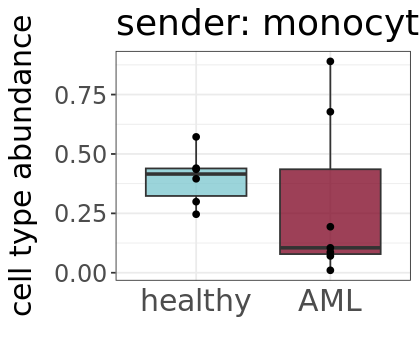

In [32]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"sender"
               ,c("healthy", "AML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F") # bordeau for AML
              ,community_interactions)

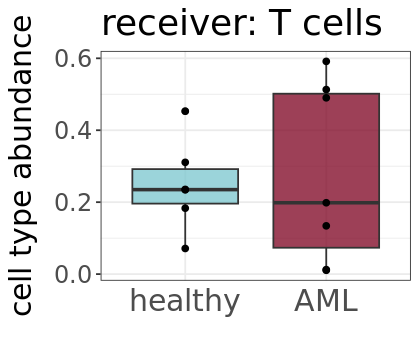

In [33]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"receiver"
               ,c("healthy", "AML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F") # bordeau for AML
              ,community_interactions)

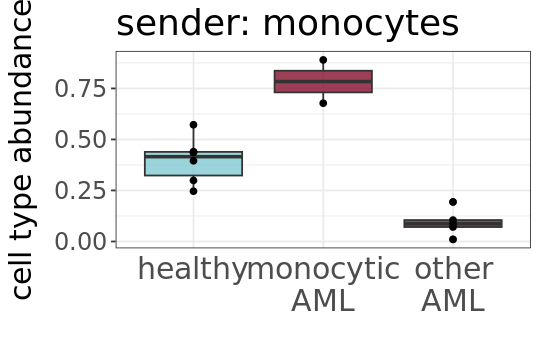

In [34]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"sender"
               ,c("healthy", "monocytic\nAML", "other\nAML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F" # bordeau for AML
                 ,"#7C001F") # bordeau for AML_mono
              ,community_interactions
              ,plot.width = 4.5)

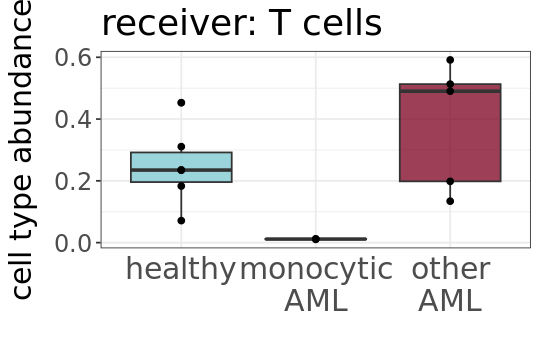

In [35]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"receiver"
               ,c("healthy", "monocytic\nAML", "other\nAML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F" # bordeau for AML
                 ,"#7C001F") # bordeau for AML_mono
              ,community_interactions
              ,plot.width = 4.5)

In [36]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/libopenblasp-r0.3.26.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggalluvial_0.12.5 ggplot2_3.4.4     eulerr_7.0.0     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.12      pillar_1.9.0     compiler_4.1.2   base64enc_0.1-3 
 [5] tools_4.1.2      digest_0.6.34    uuid_1.1-0       jsonlite_1.8.8  
 [9] evaluate_0.23   